In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Create the data frame

In [3]:
df=pd.read_csv('Zomato data .csv')

In [4]:
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


In [5]:
df

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet
...,...,...,...,...,...,...,...
143,Melting Melodies,No,No,3.3/5,0,100,Dining
144,New Indraprasta,No,No,3.3/5,0,150,Dining
145,Anna Kuteera,Yes,No,4.0/5,771,450,Dining
146,Darbar,No,No,3.0/5,98,800,Dining


### summary of the data frame(df)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


### Here its clear that there is no null value in dataframe (df)

### let's convert the data type of the "rate" column to float and remove the denominator.

In [7]:
def handleRate(value):
    value=str(value).split('/')
    value=value[0];
    return float (value)

df['rate']=df['rate'].apply(handleRate)
df.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   name                         148 non-null    object 
 1   online_order                 148 non-null    object 
 2   book_table                   148 non-null    object 
 3   rate                         148 non-null    float64
 4   votes                        148 non-null    int64  
 5   approx_cost(for two people)  148 non-null    int64  
 6   listed_in(type)              148 non-null    object 
dtypes: float64(1), int64(2), object(4)
memory usage: 8.2+ KB


## Task--What type of restaurant do the majority of customers order from? 

Text(0.5, 0, 'type of restaurant')

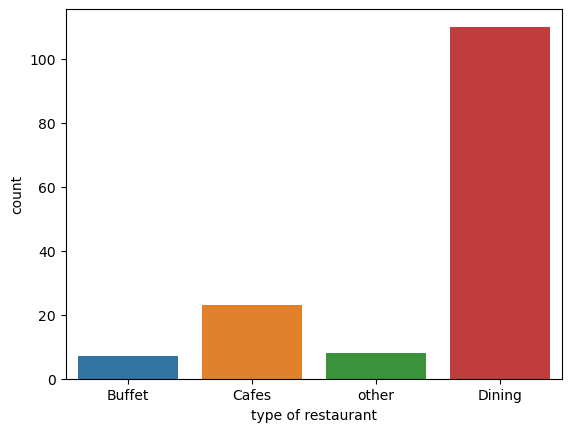

In [9]:
sns.countplot(x=df['listed_in(type)'])
plt.xlabel('type of restaurant')

### Conclusin: The majority of the restaurants fall into the dining category.

### --Dining restaurants are preferred by a larger number of individuals.

## Task--  How many votes has each type of restaurant received from customers?

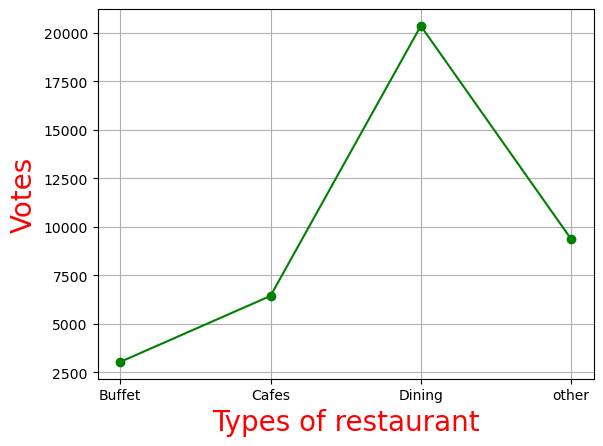

In [10]:
grouped_data= df.groupby('listed_in(type)')['votes'].sum()
result= pd.DataFrame({'votes': grouped_data})
plt.plot(result,c='green',marker='o')
plt.xlabel('Types of restaurant',c='red',size=20)
plt.ylabel('Votes',c='red',size=20)
plt.grid()

### Conclusion-- Dinning type restaurant received most of the vote followed by other ,cafes and buffet shown in above graph. 

## Task-- What are the ratings that the majority of restaurants have received?

Text(0.5, 1.0, 'Ratings Distribution')

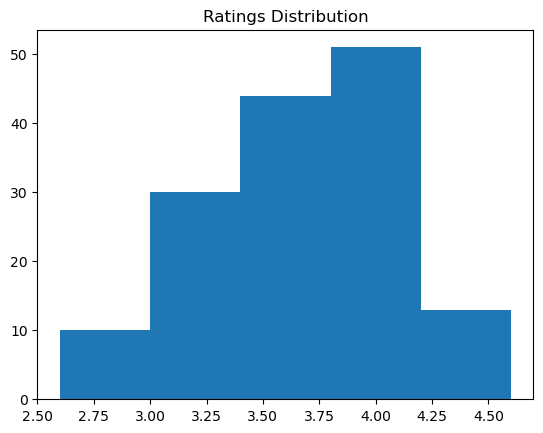

In [11]:
plt.hist(df['rate'],bins=5)
plt.title('Ratings Distribution')

### Conclusion: The majority of restaurants received ratings ranging from 3.5 to 4



## Task.. Zomato has observed that most couples order most of their food online. What is their average spending on each order?

<AxesSubplot:xlabel='approx_cost(for two people)', ylabel='count'>

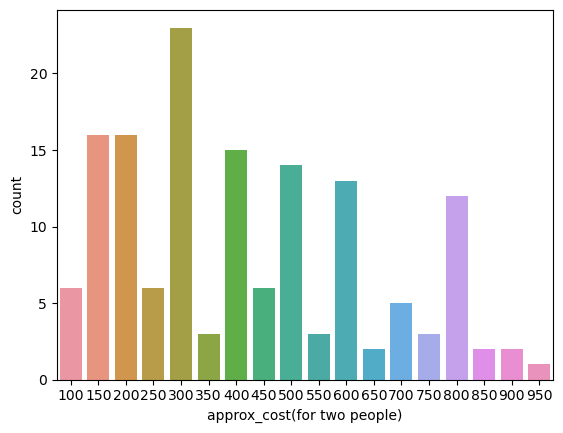

In [12]:
couple_data=df['approx_cost(for two people)']
sns.countplot(x=couple_data)

### Conclusion: We found that the approx cost of two people lies mostly between 100-400 , after that there is a significant drops in the figure.

## Task...Whether online orders receive higher ratings than offline orders.

<AxesSubplot:xlabel='online_order', ylabel='rate'>

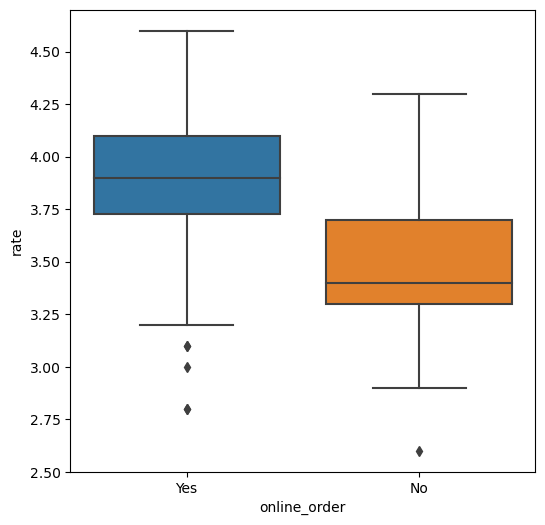

In [13]:
plt.figure(figsize=(6,6))
sns.boxplot(x='online_order', y='rate',data=df)

### Conclusion: Offline orders received lower ratings in comparison to online orders, which obtained excellent ratings.

## Task.. Which type of restaurant received more offline orders?

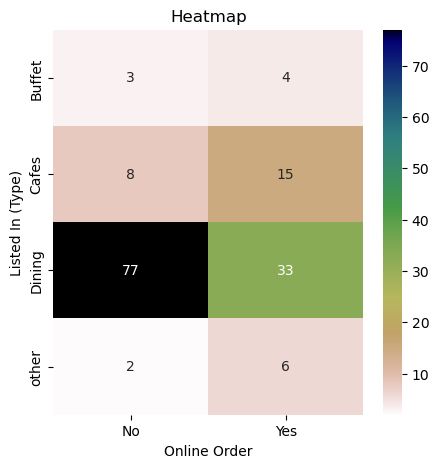

In [15]:
plt.figure(figsize=(5,5))
pivot_table=df.pivot_table(index='listed_in(type)',columns='online_order', aggfunc='size',fill_value=0)
sns.heatmap(pivot_table,annot=True ,cmap='gist_earth_r',fmt='d')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed In (Type)')
plt.show()

### Conclusion: Dining restaurants primarily accept offline orders, whereas cafes primarily receive online orders. This suggets that clients prefer to place orders in peson at restarants, but prefer online ordering at cafes.